# Customers Segmentation

A wholesale distributor recently tested a change to their delivery method for some customers, by moving from a morning delivery service five days a week to a cheaper evening delivery service three days a week.Initial testing did not discover any significant unsatisfactory results, so they implemented the cheaper option for all customers. Almost immediately, the distributor began getting complaints about the delivery service change and customers were canceling deliveries — losing the distributor more money than what was being saved. You’ve been hired by the wholesale distributor to find what types of customers they have to help them make better, more informed business decisions in the future. Your task is to use unsupervised learning techniques to see if any similarities exist between customers, and how to best segment customers into distinct categories.  
The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.


In [15]:
# import library:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
#import dataset:
data = pd.read_csv("customers.csv", sep=',')
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [17]:
#data exploring:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicatessen      440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [18]:
data.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [19]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [20]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

## Data Preprocessing:

In [21]:
# StandardScaler/ standardized:
##import library:
from sklearn.preprocessing import StandardScaler
#define scaler function:
s=StandardScaler()
#fit dataset to scaler function:
s.fit(data)
#transform dataset:
data_scaler=s.transform(data)

data_scaler = pd.DataFrame(data_scaler, columns=data.columns)

In [22]:
data_scaler.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [23]:
## Feature Transformation
### Implementation: PCA
from sklearn.decomposition import PCA
pca = PCA().fit(data_scaler)


In [24]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

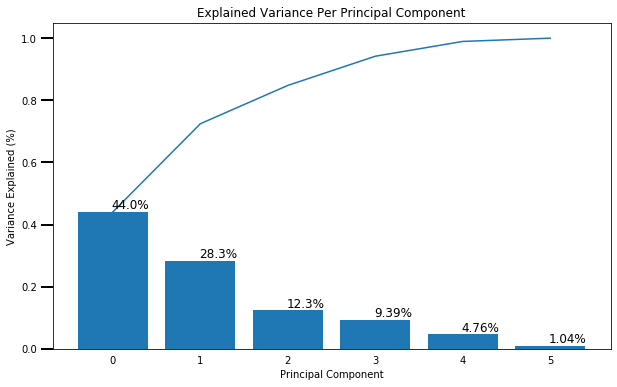

In [25]:
scree_plot(pca)

In [26]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4408,0.0429,0.5451,0.5793,0.0512,0.5486,0.2487
Dimension 2,0.2838,0.5279,0.0832,-0.1461,0.6113,-0.2552,0.5042
Dimension 3,0.1233,-0.8123,0.0604,-0.1084,0.1784,-0.1362,0.5239
Dimension 4,0.0940,-0.2367,-0.0872,0.1060,0.7687,0.1717,-0.5521
Dimension 5,0.0476,-0.0487,0.8266,-0.3150,-0.0279,-0.3396,-0.3147
Dimension 6,0.0105,-0.0360,-0.0380,0.7217,-0.0156,-0.6859,-0.0751


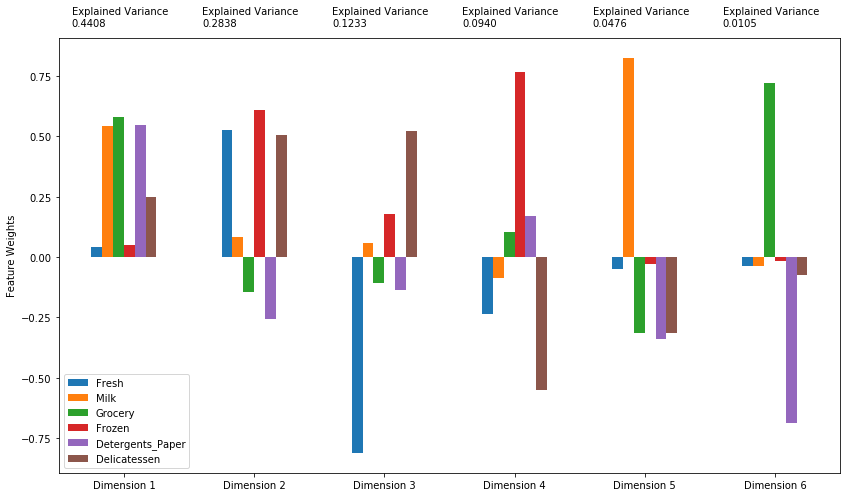

In [27]:
pca_results(data,pca)

#external resources about pca:  
what is pca: https://www.youtube.com/watch?v=g-Hb26agBFg  
pca features weights: https://www.theanalysisfactor.com/principal-component-analysis-negative-loadings/  
pca features weights: https://stackoverflow.com/questions/47370795/pca-on-sklearn-how-to-interpret-pca-components

In [28]:
##import library:

#define pca and set number of n_components:
pca=PCA(n_components=2)

#fit dataset to pca:
pca.fit(data_scaler)

#transform dataset:
reduced_data = pca.transform(data_scaler)




In [29]:
reduced_data

array([[ 1.93290546e-01, -3.05099963e-01],
       [ 4.34419896e-01, -3.28412623e-01],
       [ 8.11143234e-01,  8.15095701e-01],
       [-7.78647832e-01,  6.52753734e-01],
       [ 1.66287259e-01,  1.27143372e+00],
       [-1.56169932e-01, -2.95140988e-01],
       [-3.35288404e-01, -5.25003258e-01],
       [ 1.40586434e-01, -2.30992687e-01],
       [-5.17319541e-01, -6.59362827e-01],
       [ 1.59210908e+00, -7.41011332e-01],
       [ 6.38085945e-01, -4.01825201e-01],
       [-9.27692579e-01, -2.19287242e-01],
       [ 9.91362176e-01,  6.85910808e-01],
       [ 8.50246760e-01, -8.56919642e-02],
       [ 8.45043794e-01,  1.54724325e-01],
       [-9.51585375e-01, -4.95908498e-01],
       [ 5.57558717e-01, -1.02612272e+00],
       [-3.52538598e-01,  2.07075910e-01],
       [ 3.16578563e-01,  4.42066292e-01],
       [-3.23755737e-01, -7.03586946e-01],
       [-3.20000597e-01,  1.56628147e-01],
       [-1.11844720e+00, -2.30527519e-01],
       [-1.76694545e-01,  2.14371699e+00],
       [ 4.

# Build KMean model:
## How to choose the best number of clusters?

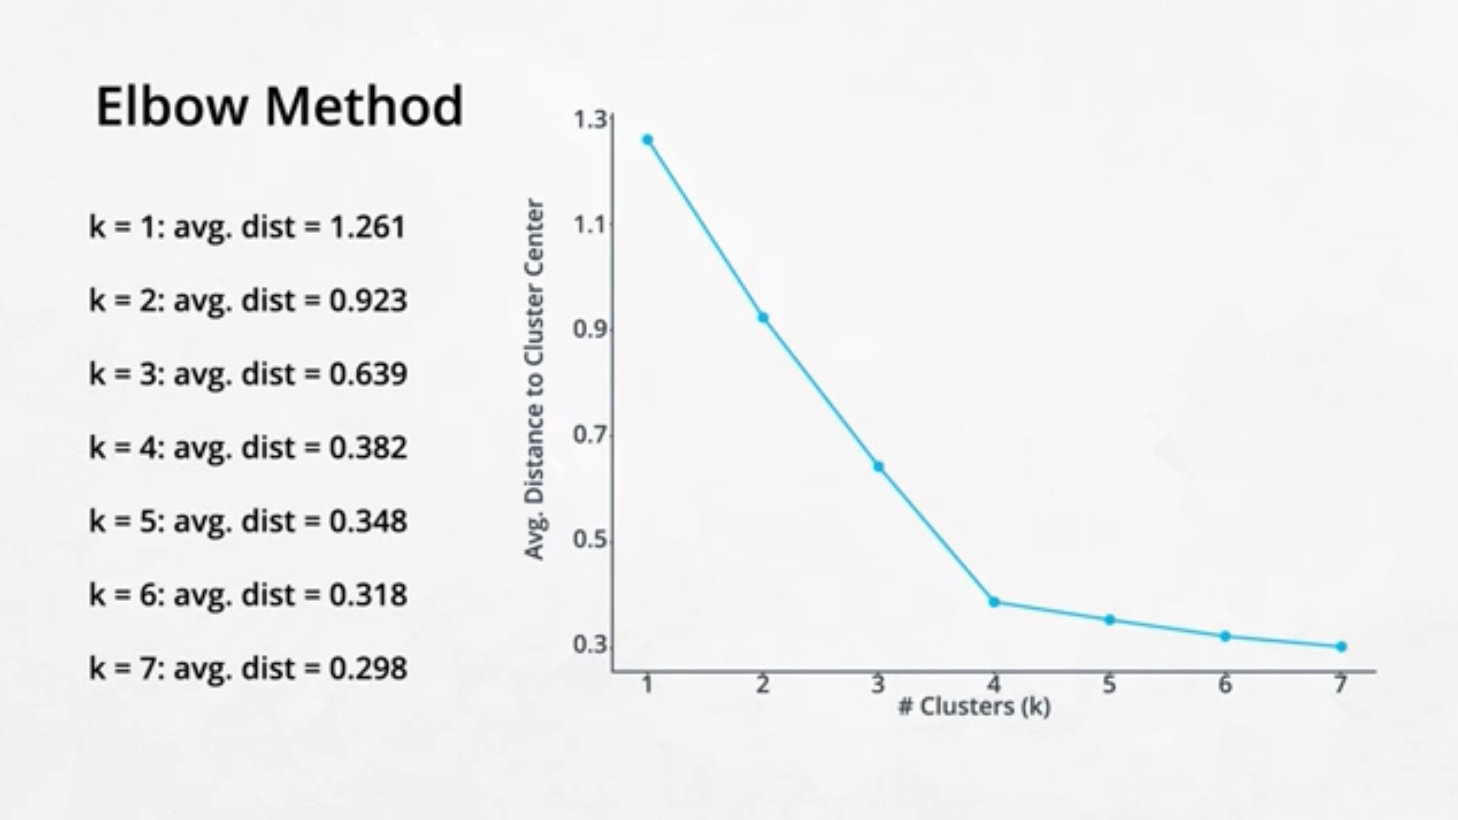

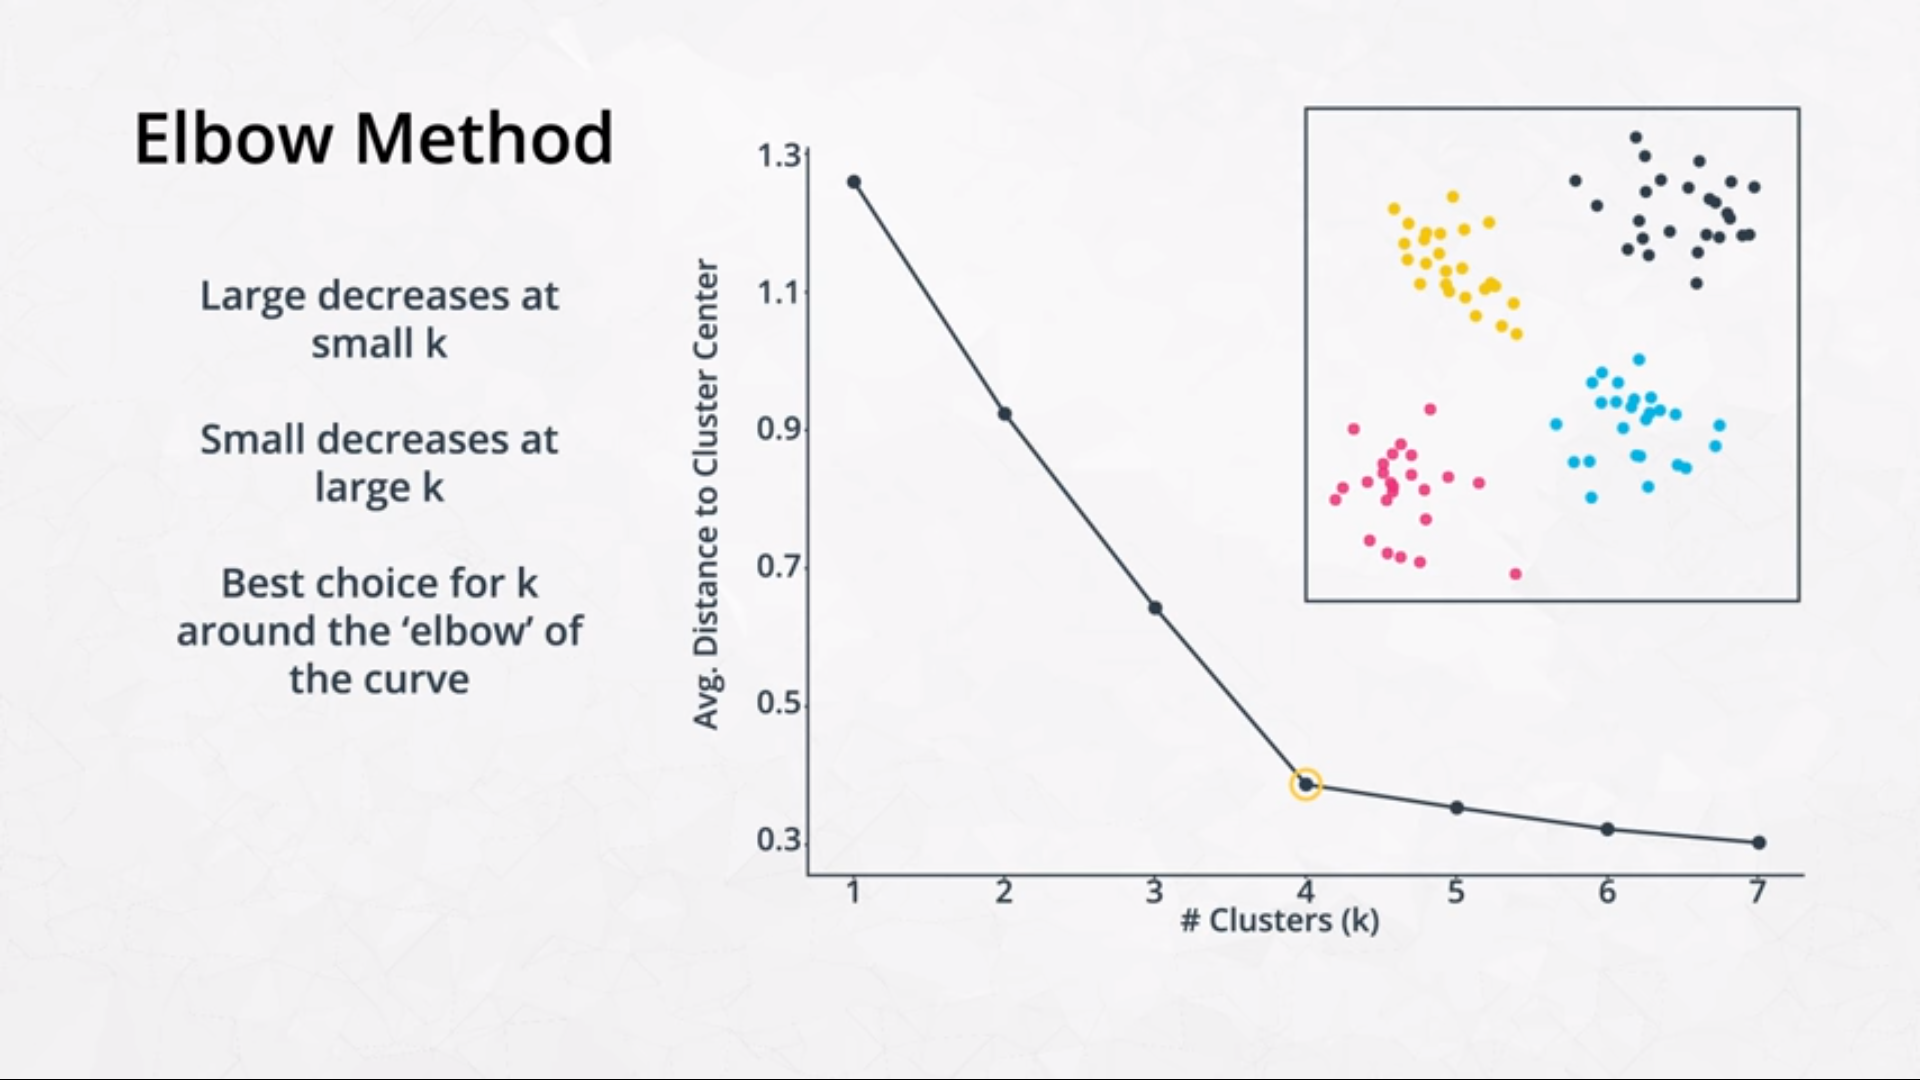

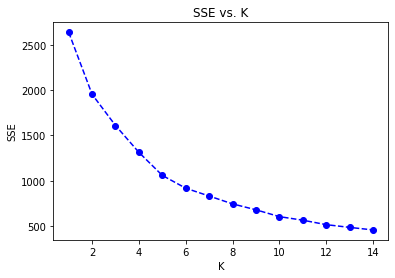

In [30]:
# A place for your work - create a scree plot - you will need to
# Fit a kmeans model with changing k from 1-10
# Obtain the score for each model (take the absolute value)
# Plot the score against k
from sklearn.cluster import KMeans
def get_kmeans_score(data, center):
    '''
    returns the kmeans score regarding SSE for points to centers
    INPUT:
        data - the dataset you want to fit kmeans to
        center - the number of centers you want (the k value)
    OUTPUT:
        score - the SSE score for the kmeans model fit to the data
    '''
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center)

    # Then fit the model to your data using the fit method
    model = kmeans.fit(data)
    
    # Obtain a score related to the model fit
    score = np.abs(model.score(data))
    
    return score

scores = []
centers = list(range(1,15))

for center in centers:
    scores.append(get_kmeans_score(data_scaler, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

In [31]:
from sklearn.cluster import KMeans
#build the model:
#intiate a model with  k cluster
kmeans = KMeans(n_clusters=2)

# Then fit the model to your data using the fit method
model = kmeans.fit(reduced_data)

# Finally get the labels on the same data to show the cluster/group for each point point that belongs to
labels = model.predict(reduced_data)


In [32]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

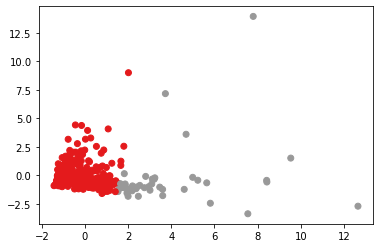

In [33]:
#plotting 
# Plot the original data with clusters
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels, cmap='Set1');

In [34]:
centroid_0=s.inverse_transform(pca.inverse_transform(model.cluster_centers_[0]))
pd.Series(data =centroid_0, index = data.columns)

Fresh               12083.154949
Milk                 4142.585285
Grocery              5585.281223
Frozen               3105.642922
Detergents_Paper     1731.345246
Delicatessen         1297.581943
dtype: float64

In [35]:
centroid_1=s.inverse_transform(pca.inverse_transform(model.cluster_centers_[1]))
pd.Series(data =centroid_1, index = data.columns)

Fresh               11272.995446
Milk                20311.906947
Grocery             28719.464823
Frozen               2776.023238
Detergents_Paper    12977.236175
Delicatessen         3519.958504
dtype: float64

# Other Clustering algorithms:

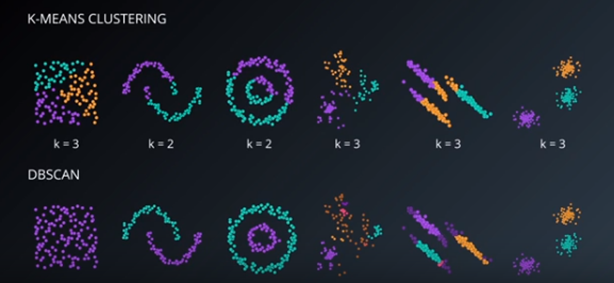

In [36]:
#DBSCAN:
#TODO: Import sklearn's cluster module
from sklearn import cluster
#TODO: create an instance of DBSCAN
dbscan = cluster.DBSCAN()
#TODO: use DBSCAN's fit_predict to return clustering labels for dataset_1
DBSCAN_labels = dbscan.fit_predict(reduced_data)

In [37]:
DBSCAN_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

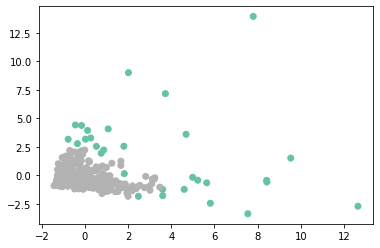

In [38]:
#plotting 
# Plot the original data with clusters
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=DBSCAN_labels, cmap='Set2');

In [39]:
## build with Hierarchical clustering:

from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=2, linkage='ward') #linkage="complete" or "average" or "ward"
ward_labels = ward.fit_predict(reduced_data)


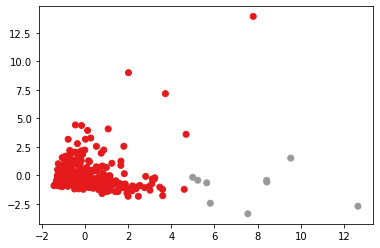

In [40]:
#plotting 
# Plot the original data with clusters
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=ward_labels, cmap='Set1');

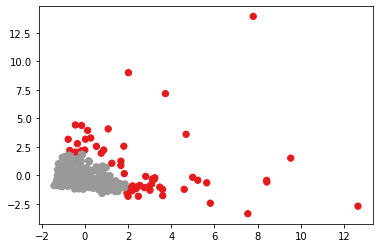

In [41]:
#GMM:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2).fit(reduced_data)
labels = gmm.predict(reduced_data)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, s=40, cmap='Set1');

## Save the new dataset with corresponding labels:

In [42]:
# we will use this copy of dataset later
data2=data.copy()

In [43]:
data['label']=labels
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,label
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


In [44]:
# save the new dataset:
data.to_csv('customers segmentation.csv' , index=False)

In [45]:
#extra point:
##predict new customers:
sample= data2.sample(5)
sample

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
160,1725,3651,12822,824,4424,2157
174,286,1208,5241,2515,153,1442
211,12119,28326,39694,4736,19410,2870
68,2446,7260,3993,5870,788,3095
436,39228,1431,764,4510,93,2346


In [46]:
scaling_sample=s.transform(sample)
reduced_sample=pca.transform(scaling_sample)
labels = model.predict(reduced_sample)
labels

array([0, 0, 1, 0, 0], dtype=int32)

In [47]:
i_sample = s.inverse_transform(pca.inverse_transform(reduced_sample))
dataframe = pd.DataFrame(i_sample, columns=data2.columns)
dataframe

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6958.309677,6576.946114,10758.685039,833.359561,4650.494493,634.567426
1,8604.048267,2023.432178,3764.768268,1555.985110,1136.087973,291.389352
2,10624.977142,28069.086104,39905.646129,2502.667571,18435.972569,4534.421048
3,14699.524259,5096.781773,6050.276698,4269.822832,1742.097711,1959.983890
4,22695.275910,3197.529755,663.348622,7818.585169,-1515.010193,3274.368300
